I've tried to find data for this, but not many open source datasets indicating willingess to see primary care physicians. I've generated some below as a sample. We're taking 10000 observations of X with a normal distribution with mean (mu) 20 miles, Standard Deviation of 5 miles. We'll set the treatment threshold at 22 miles, and apply a binary indicator of whether treatment is received. The y variable is defined by x, such that as distance increases, y decreases. If treatment is applied, it modifies the y variable based on an arbitrary constant. I've assigned an error measure that is normally distributed (mu = 0, sigma = 5). 

In [187]:
import math
N = 10000
x = np.random.normal(20, 5, N)
epsilon = np.random.normal(0, 5, N)
threshold = 22
treatment = np.where(x >= threshold, 1, 0)
y = 12 * treatment - 2 * x + epsilon
y = (y-min(y))/(max(y)-min(y))

data = pd.DataFrame({'y':y, 'x': x})
data.head()

,y,x
0,0.630171,17.691697
1,0.670726,10.160963
2,0.421833,26.487341
3,0.500114,27.089477
4,0.417476,21.279013


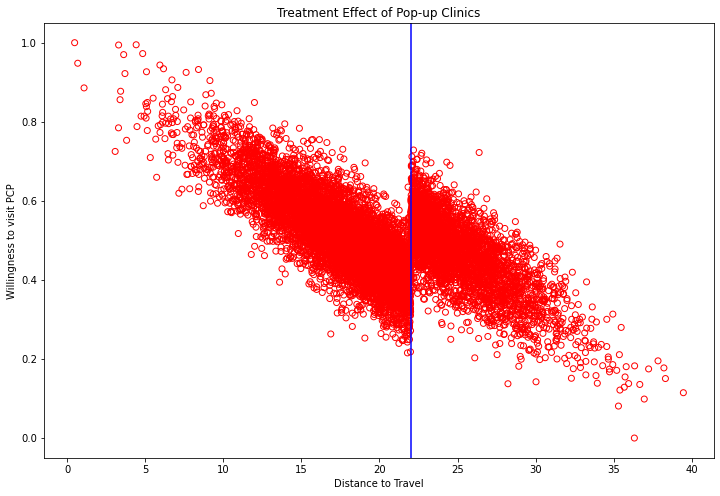

In [195]:

plt.figure(figsize=(12, 8))
plt.scatter(data['x'], data['y'], facecolors='none', edgecolors='r')
plt.xlabel('Distance to Travel')
plt.ylabel('Willingness to visit PCP')
plt.title('Treatment Effect of Pop-up Clinics')
plt.axvline(x=threshold, color='b')
plt.show()
plt.close()

In [189]:
bandwidth_opt = rdd.optimal_bandwidth(data['y'], data['x'], cut=threshold)
print("Optimal bandwidth:", bandwidth_opt)

Optimal bandwidth: 1.185335686991167


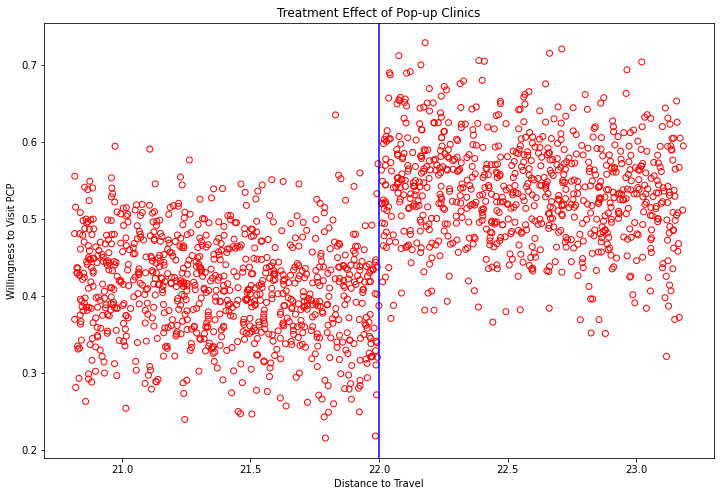

In [194]:
data_rdd = rdd.truncated_data(data, 'x', bandwidth_opt, cut=threshold)
plt.figure(figsize=(12, 8))
plt.scatter(data_rdd['x'], data_rdd['y'], facecolors='none', edgecolors='r')
plt.xlabel('Distance to Travel')
plt.ylabel('Willingness to Visit PCP')
plt.title('Treatment Effect of Pop-up Clinics')
plt.axvline(x=threshold, color='b')
plt.show()
plt.close()

In [203]:
data.y.loc[data.x>22]

2       0.421833
3       0.500114
11      0.353430
12      0.495497
16      0.596666
          ...   
9992    0.343697
9993    0.442650
9996    0.549969
9997    0.358893
9998    0.412364
Name: y, Length: 3353, dtype: float64

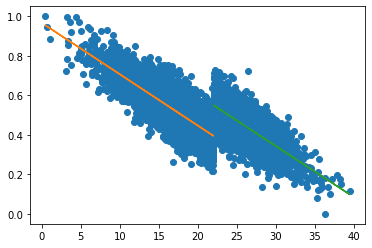

In [210]:
plt.plot(data.x, data.y, 'o')
m1,b1 = np.polyfit(data.x.loc[data.x<22],data.y.loc[data.x<22],1)
plt.plot(data.x.loc[data.x<22], m1*data.x.loc[data.x<22] + b1)
m2,b2 = np.polyfit(data.x.loc[data.x>22],data.y.loc[data.x>22],1)
plt.plot(data.x.loc[data.x>22], m2*data.x.loc[data.x>22] + b2)
plt.show()
plt.close()

Our regression explains 48.6% of the variance, where the treatment effect is an increase of 16.12% more likely to visit their PCP. This is generated data, but I wanted to explain my thoughts for how it can be applied to research. If we were able to conduct surveys in rural areas measuring the respondents' willingness to visit primary care physicians and their relative distance to travel, then apply treatment at a threshold (where treatment is a pop-up clinic) and conduct followup surveys, we'd be able to measure the treatment effect. 

In [192]:
model = rdd.rdd(data_rdd, 'x', 'y', cut=threshold)
print(model.fit().summary())

Estimation Equation:	 y ~ TREATED + x
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.486
Model:                            WLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     792.3
Date:                Mon, 20 Sep 2021   Prob (F-statistic):          6.83e-243
Time:                        14:02:07   Log-Likelihood:                 2176.9
No. Observations:                1678   AIC:                            -4348.
Df Residuals:                    1675   BIC:                            -4332.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     